In [ ]:
##Let's regress SalePrice onto LotArea to start with

In [90]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, HuberRegressor

dftrain = pd.read_csv("train.csv", engine='python')
dftest = pd.read_csv("test.csv", engine='python')
print(dftrain.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
dftrain.shape

(1460, 81)

In [3]:
dftrain.sample(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1234  1235          70       RH         55.0     8525   Pave   NaN      Reg   
1042  1043         120       RL         34.0     5381   Pave   NaN      IR1   
1363  1364          60       RL         73.0     8499   Pave   NaN      IR1   
1367  1368         160       RM         41.0     2665   Pave   NaN      Reg   
814    815          50       RL         45.0     8248   Pave  Grvl      Reg   
474    475         120       RL         41.0     5330   Pave   NaN      Reg   
1418  1419          20       RL         71.0     9204   Pave   NaN      Reg   
481    482          20       RL         72.0    11846   Pave   NaN      IR1   
399    400          60       FV         65.0     8125   Pave   NaN      Reg   
31      32          20       RL          NaN     8544   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1234         Bnk    AllPub  ...        0    NaN    NaN         NaN       0   
1042         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1363         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1367         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
814          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
474          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1418         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
481          HLS    AllPub  ...        0    NaN    NaN         NaN       0   
399          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
31           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1234     11   2008        WD        Abnorml     130000  
1042      8   2009        WD         Normal     196000  
1363      3   2007       New        Partial     156932  
1367      7   2006        WD         Normal     127000  
814       7   2006        WD         Normal     116000  
474       8   2007        WD         Normal     251000  
1418      8   2008       COD         Normal     124000  
481       8   2006        WD         Normal     374000  
399      10   2009        WD         Normal     241000  
31        6   2008        WD         Normal     149350  

[10 rows x 81 columns]

In [4]:
dftrain.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [2]:
dftrain['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [3]:
report = pandas_profiling.ProfileReport(dftrain)
report

In [4]:
df_num = dftrain.select_dtypes(include = ['float64', 'int64'])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [5]:
df_object = dftrain.select_dtypes(include = ['object'])
df_num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [6]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


In [7]:
dftrain['AreaBin'] = pd.cut(dftrain.LotArea, 20, labels=False)
# Using another column other than age is also OK because we just need the count
X = dftrain.groupby('AreaBin')[['LotArea', 'LotFrontage']].agg({'LotArea':'mean', 'LotFrontage':'count'})
X.columns = ['LotArea', 'count']

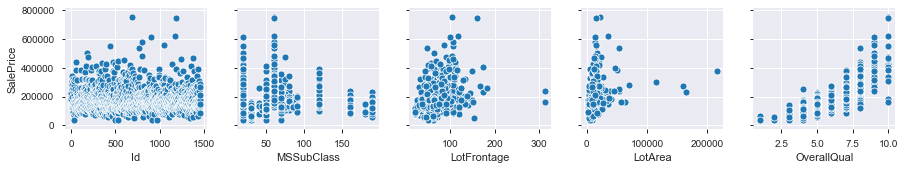

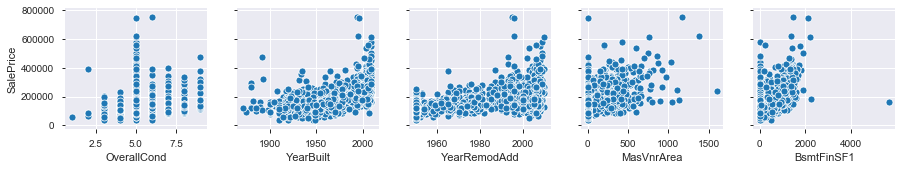

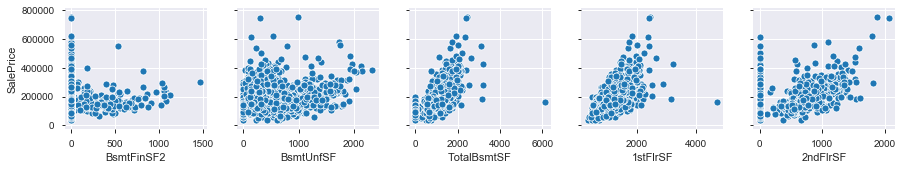

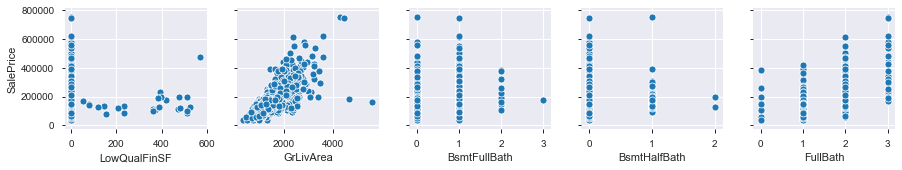

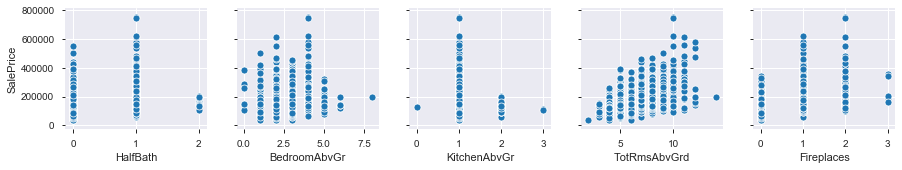

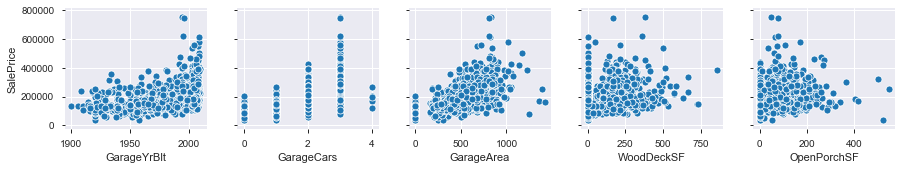

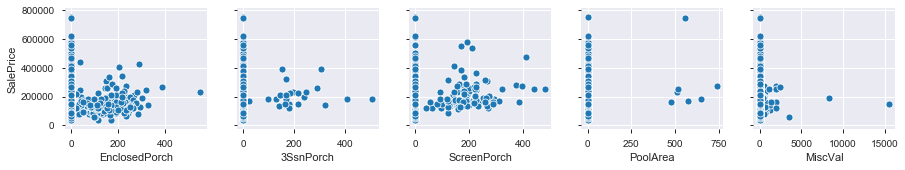

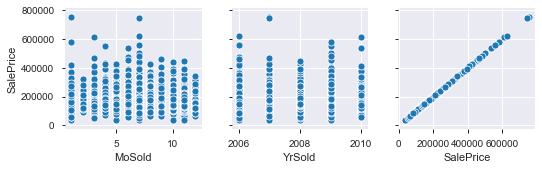

In [11]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


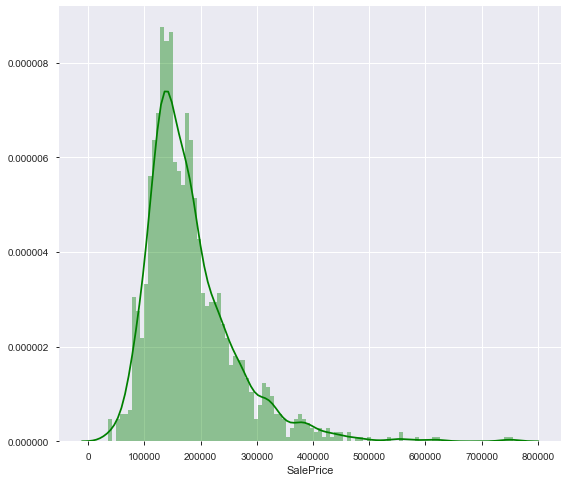

In [8]:
print(dftrain['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(dftrain['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


 mu = 180921.20 and sigma = 79415.29


 mu = 12.02 and sigma = 0.40



Text(0.5, 0.98, 'After transformation')

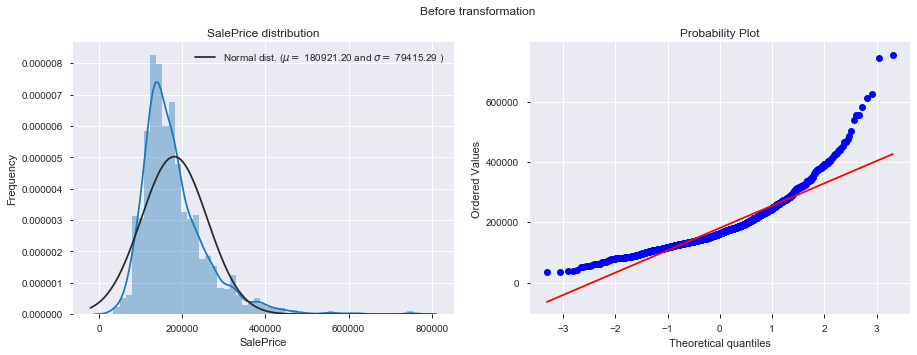

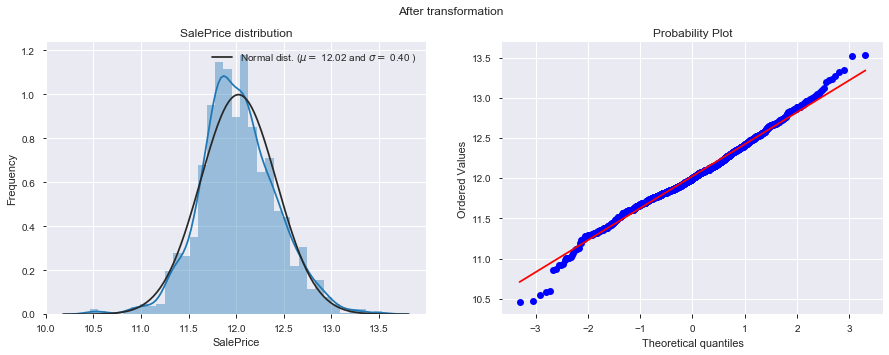

In [9]:
##SalePrice distribution, and normalized
##Probability plot, and normalized

from scipy import stats
from scipy.stats import norm, skew #for some statistics

# Plot histogram and probability
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_num['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_num['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_num['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# Apply transformation
df_num.SalePrice = np.log1p(df_num.SalePrice)
# New prediction
y_train = df_num.SalePrice.values
y_train_orig = df_num.SalePrice


# Plot histogram and probability after transformation
fig = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(df_num['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_num['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')
plt.subplot(1,2,2)
res = stats.probplot(df_num['SalePrice'], plot=plt)
plt.suptitle('After transformation')

In [10]:
np.unique(dftrain.dtypes)

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [11]:
train_float = dftrain.select_dtypes(include = ['float64'])
test_float = dftest.select_dtypes(include = ['float64'])
train_float.dtypes

LotFrontage    float64
MasVnrArea     float64
GarageYrBlt    float64
dtype: object

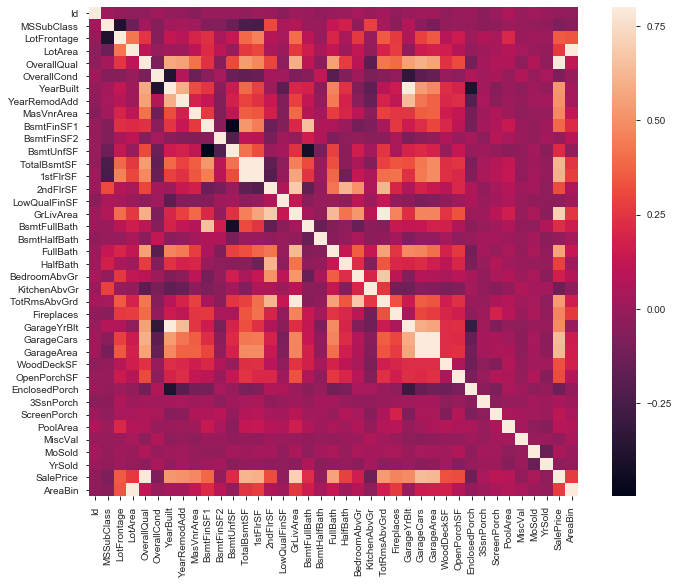

In [12]:
#heatmap correlation matrix
corrmat = dftrain.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [13]:
dftrain_corr = dftrain.select_dtypes(include=[np.number])

In [14]:
dftrain_corr.shape

(1460, 39)

In [15]:
del dftrain_corr['Id']

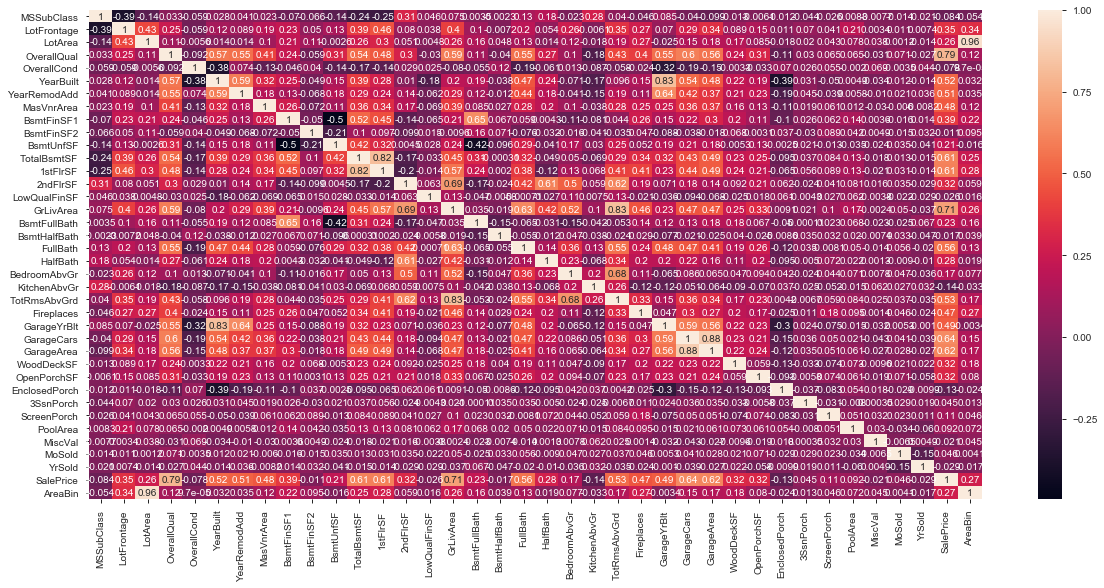

In [16]:
corr = dftrain_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

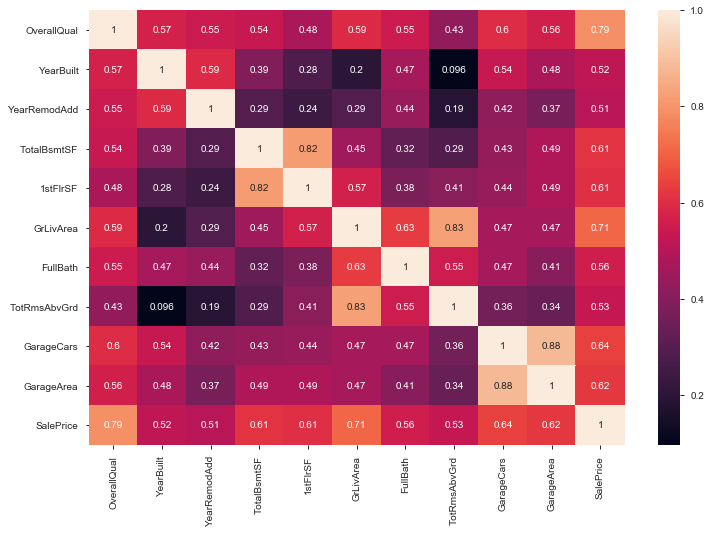

In [17]:
##Top 50 corr
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = dftrain[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [18]:
## Cleaning data

In [19]:
dftrain.isna().sum().head()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage    259
LotArea          0
dtype: int64

In [20]:
##Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [21]:
## Dropping columns

In [22]:
# Dropping Utilities; is useless
dftrain.drop(['Utilities'], axis=1,inplace=True)

In [23]:
## Dropping 'PoolQC' for having too many NaNs; 
dftrain.drop(['PoolQC'],axis=1,inplace=True)

In [27]:
## Dropping 'Fence' for having too many NaNs; 
dftrain.drop(['Fence'],axis=1,inplace=True)

KeyError: "['Fence'] not found in axis"

In [29]:
## Dropping MiscFeature' for having too many NaNs; 
dftrain.drop(['MiscFeature'],axis=1,inplace=True)

KeyError: "['MiscFeature'] not found in axis"

In [30]:
## Dropping 'Alley' for same reason
dftrain.drop(['Alley'],axis=1,inplace=True)

In [31]:
## Dropping 'GarageYrBlt' - highly colinear with 'YearBuilt'; also has many NaNs
dftrain.drop(['GarageYrBlt'],axis=1,inplace=True)

In [32]:
## Dropping Id; is useless
dftrain.drop(['Id'],axis=1,inplace=True)

In [33]:
dftrain.shape

(1460, 75)

In [34]:
## Imputing values

In [35]:
## Imputing BsmtCond and BsmtQual by mode
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])

In [36]:
##GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
# for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
#     dftrain[col] = dftrain[col].fillna('None')
## Revised approach: imputing garage variables
dftrain['GarageFinish']=dftrain['GarageFinish'].fillna(dftrain['GarageFinish'].mode()[0])
dftrain['GarageQual']=dftrain['GarageQual'].fillna(dftrain['GarageQual'].mode()[0])
dftrain['GarageCond']=dftrain['GarageCond'].fillna(dftrain['GarageCond'].mode()[0])
dftrain['GarageType']=dftrain['GarageType'].fillna(dftrain['GarageType'].mode()[0])

In [37]:
## 'FireplaceQu' comes in under the 50% NaN threshold for dropping a column; however, will keep this variable in mind when testing. Imputation could skew final result
dftrain['FireplaceQu']=dftrain['FireplaceQu'].fillna(dftrain['FireplaceQu'].mode()[0])

In [38]:
# ##Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
# dftrain['LotFrontage'] = dftrain.groupby("Neighborhood")["LotFrontage"].transform(
#     lambda x: x.fillna(x.median()))
## Reimputing LotFrontage this way:
dftrain['LotFrontage']=dftrain['LotFrontage'].fillna(dftrain['LotFrontage'].mean())

In [39]:
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
# for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
#     dftrain[col] = dftrain[col].fillna('None')
## Trying imputation: Filling with 'None' method doesn't work
dftrain['BsmtExposure']=dftrain['BsmtExposure'].fillna(dftrain['BsmtExposure'].mode()[0])
# dftrain['BsmtFinType1']=dftrain['BsmtFinType1'].fillna(dftrain['BsmtFinType1'].mode()[0])
dftrain['BsmtFinType2']=dftrain['BsmtFinType2'].fillna(dftrain['BsmtFinType2'].mode()[0])
dftrain['BsmtQual']=dftrain['BsmtQual'].fillna(dftrain['BsmtQual'].mode()[0])
dftrain['BsmtCond']=dftrain['BsmtCond'].fillna(dftrain['BsmtCond'].mode()[0])

In [40]:
# MasVnrType and MasVnrArea: replace with 0
dftrain['MasVnrArea'] = dftrain['MasVnrArea'].fillna(dftrain['MasVnrArea'].mode()[0])
dftrain['MasVnrType'] = dftrain['MasVnrType'].fillna(dftrain['MasVnrType'].mode()[0])

In [41]:
## Imputing 'Electrical' with mode
# dftrain['Electrical'] = dftrain['Electrical'].fillna(dftrain['Electrical']).mode()[0]

In [42]:
# #GarageYrBlt, GarageArea and GarageCars these are replacing with zero
# for col in ['GarageArea', 'GarageCars']:
#     dftrain[col] = dftrain[col].fillna(int(0))

In [43]:
dftrain.shape

(1460, 75)

In [44]:
##Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

BsmtFinType1    2.534247
Electrical      0.068493
dtype: float64

In [45]:
dftrain.dropna(inplace=True)

In [46]:
dftrain.shape

(1422, 75)

In [47]:
##Proportion of NaNs within columns
Isnull = dftrain.isnull().sum()/len(dftrain)*100
Isnull = Isnull[Isnull>0]
Isnull.sort_values(inplace=True, ascending = False)
Isnull

Series([], dtype: float64)

In [48]:
## Dealing with the categoricals

In [54]:
columns=['MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [53]:
len(columns)

38

In [51]:
## Converts categorical variables to dummy values

def category_onehot_multcols(multcolumns):
    df_final=dfcombined
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(dfcombined[fields],drop_first=True)
        
        dfcombined.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([dfcombined,df_final],axis=1)
        
    return df_final

In [55]:
main_df=dftrain.copy()

In [55]:
## Combining Test Data 

In [58]:
test_df.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [57]:
test_df=dftest.copy()

In [53]:
#df_test=pd.read_csv('formulatedtest.csv')

FileNotFoundError: [Errno 2] File b'formulatedtest.csv' does not exist: b'formulatedtest.csv'

In [59]:
## Checking to see if it matches .shape in test_data_cleaning
df_test.shape

NameError: name 'df_test' is not defined

In [62]:
test_df.shape

(1459, 80)

In [61]:
#df_test.head()

NameError: name 'df_test' is not defined

In [59]:
#dfcombined=pd.concat([dftrain,df_test],axis=0)

In [67]:
dfcombined=pd.concat([dftrain,test_df],axis=0)

In [68]:
dfcombined.shape

(2881, 82)

In [65]:
#dfcombined=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [66]:
dfcombined.shape

(2881, 82)

In [69]:
df_Train=dfcombined.iloc[:1422,:]
df_Test=dfcombined.iloc[1422:,:]

In [70]:
dfcombined.shape

(2881, 82)

In [71]:
## Removes duplicate columns
dfcombined =dfcombined.loc[:,~dfcombined.columns.duplicated()]

In [72]:
dfcombined.shape

(2881, 82)

In [73]:
dfcombined['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
          ...   
1429         NaN
1430         NaN
1431         NaN
1432         NaN
1433         NaN
1434         NaN
1435         NaN
1436         NaN
1437         NaN
1438         NaN
1439         NaN
1440         NaN
1441         NaN
1442         NaN
1443         NaN
1444         NaN
1445         NaN
1446         NaN
1447         NaN
1448         NaN
1449         NaN
1450         NaN
1451         NaN
1452         NaN
1453         NaN
1454         NaN
1455         NaN
1456         N

In [74]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [75]:
for col in df_Train:
    print(col)

1stFlrSF
2ndFlrSF
3SsnPorch
Alley
AreaBin
BedroomAbvGr
BldgType
BsmtCond
BsmtExposure
BsmtFinSF1
BsmtFinSF2
BsmtFinType1
BsmtFinType2
BsmtFullBath
BsmtHalfBath
BsmtQual
BsmtUnfSF
CentralAir
Condition1
Condition2
Electrical
EnclosedPorch
ExterCond
ExterQual
Exterior1st
Exterior2nd
Fence
FireplaceQu
Fireplaces
Foundation
FullBath
Functional
GarageArea
GarageCars
GarageCond
GarageFinish
GarageQual
GarageType
GarageYrBlt
GrLivArea
HalfBath
Heating
HeatingQC
HouseStyle
Id
KitchenAbvGr
KitchenQual
LandContour
LandSlope
LotArea
LotConfig
LotFrontage
LotShape
LowQualFinSF
MSSubClass
MSZoning
MasVnrArea
MasVnrType
MiscFeature
MiscVal
MoSold
Neighborhood
OpenPorchSF
OverallCond
OverallQual
PavedDrive
PoolArea
PoolQC
RoofMatl
RoofStyle
SaleCondition
SalePrice
SaleType
ScreenPorch
Street
TotRmsAbvGrd
TotalBsmtSF
Utilities
WoodDeckSF
YearBuilt
YearRemodAdd
YrSold


In [76]:
x_traintest
y_traintest

NameError: name 'x_traintest' is not defined

In [89]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

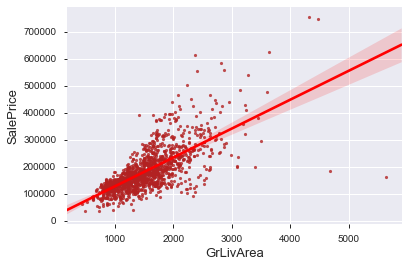

In [78]:
fig, ax = plt.subplots()
ax= sns.regplot(df_Train['GrLivArea'], df_Train['SalePrice'], scatter_kws={"color": "firebrick", 's': 10}, line_kws={"color": "red"})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [79]:
train = df_Train.drop(df_Train[(df_Train['GrLivArea']>4000) & (df_Train['SalePrice']<300000)].index)

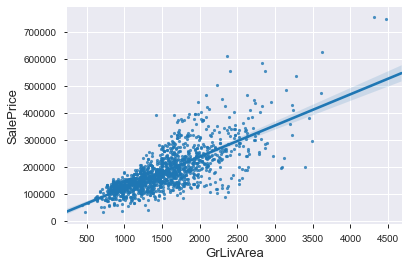

In [80]:
fig, ax = plt.subplots()
ax = sns.regplot(train['GrLivArea'], train['SalePrice'], scatter_kws={'s': 10})
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [93]:
#lm2 = LinearRegression()
#sale2 = dftrain.loc[~dftrain.isnull().any(axis=1)] # how to remove the rows with missingness
#lm2.fit(dftrain[['SalePrice']], dftrain['GrLivArea'])
#print('intercept %.2f' %(lm2.intercept_))
#print('slope %.4f' %(lm2.coef_))

intercept 667.44
slope 0.0047


In [96]:
lm2 = LinearRegression()
sale2 = dftrain.loc[~dftrain.isnull().any(axis=1)] # how to remove the rows with missingness
lm2.fit(dftrain[['GrLivArea']], dftrain['SalePrice'])
print('intercept %.2f' %(lm2.intercept_))
print('slope %.4f' %(lm2.coef_))

intercept 18569.03
slope 107.1304


In [97]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [101]:
features = sm.add_constant(dftrain[['GrLivArea']])
ols_sm   = OLS(dftrain.SalePrice, features)
model    = ols_sm.fit()

In [102]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          4.52e-223
Time:                        03:20:51   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

In [ ]:
for col in df_num.columns:
    print(col)

In [ ]:
##Adding samples of simple linear regressions; (['GarageArea'],['1stflrSF'],['2ndflrSF'],['GrLivArea'])

In [81]:
# defining the data/predictors as the feature names  
df = dftrain

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(dftrain, columns=["SalePrice"])

In [82]:
for col in df: 
    print (col)

MSSubClass
MSZoning
LotFrontage
LotArea
Street
LotShape
LandContour
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
OverallQual
OverallCond
YearBuilt
YearRemodAdd
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinSF1
BsmtFinType2
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Heating
HeatingQC
CentralAir
Electrical
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
KitchenQual
TotRmsAbvGrd
Functional
Fireplaces
FireplaceQu
GarageType
GarageFinish
GarageCars
GarageArea
GarageQual
GarageCond
PavedDrive
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SaleType
SaleCondition
SalePrice
AreaBin


In [82]:
X = df['GarageArea']
y = target

In [83]:
import statsmodels.api as sm


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                          1.050e+04
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:08:30   Log-Likelihood:                         -17858.
No. Observations:                1422   AIC:                                  3.572e+04
Df Residuals:                    1421   BIC:                                  3.572e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GarageArea   358.8021      3.501    102.476      0.000     351.934     365.670
==============================================================================
Omnibus:                      200.631   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1739.309
Skew:                           0.351   Prob(JB):                         0.00
Kurtosis:                       8.373   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
##Adding a second variable

In [85]:
X = df[['GarageArea', 'TotalBsmtSF']]
y = target

In [86]:
import statsmodels.api as sm


model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.920
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              8185.
Date:                Tue, 12 Nov 2019   Prob (F-statistic):                        0.00
Time:                        22:08:59   Log-Likelihood:                         -17573.
No. Observations:                1422   AIC:                                  3.515e+04
Df Residuals:                    1420   BIC:                                  3.516e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GarageArea    172.5058      7.600     22.698      0.000     157.597     187.415
TotalBsmtSF    90.4378      3.417     26.466      0.000      83.735      97.141
==============================================================================
Omnibus:                      341.668   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16313.795
Skew:                          -0.167   Prob(JB):                         0.00
Kurtosis:                      19.590   Cond. No.                         6.95
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
####Running 

In [87]:
##Predicting with sci kit learn linear regression
from sklearn import linear_model

In [83]:
# defining the data/predictors as the feature names  
df = pd.DataFrame(dftrain, columns=dftrain['GarageArea'])

# Put the target (housing value -- 'SalePrice') in another DataFrame
target = pd.DataFrame(dftrain, columns=["SalePrice"])

In [84]:
X = df
y = target

In [85]:
type(target)

pandas.core.frame.DataFrame

In [86]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

NameError: name 'linear_model' is not defined

In [92]:
lm = LinearRegression()
# scikit-learn expects input X to be a two-dimensional structure
lm.fit(X[['LotArea']], X['SalePrice'])
print('intercept %.2f' %(lm.intercept_))
print('slope %.2f' %(lm.coef_))

KeyError: "None of [Index(['LotArea'], dtype='object', name='GarageArea')] are in the [columns]"

In [93]:
Y = X[X['count']<400]
X.plot.scatter(x = 'LotArea', y = 'count')

KeyError: 'count'

In [87]:
from sklearn.tree import DecisionTreeClassifier

X = 
y = 
# Make a decision tree and train
tree = DecisionTreeClassifier(random_state=RSEED)
tree.fit(X, y)

SyntaxError: invalid syntax (<ipython-input-87-4f4a1ea4dca2>, line 3)